In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
from sklearn import tree


df = pd.read_csv('mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


Очень вкусный грибной датасет

In [15]:
gc = df['gill-color']
sw = df['stem-width']

y = df['class']

x = []

for i in range(len(sw)):
    x.append([sw[i], gc[i]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
print(x_train)

[[238, 10], [704, 10], [1499, 10], [305, 5], [1149, 10], [307, 7], [1157, 11], [711, 3], [784, 10], [476, 8], [280, 5], [732, 2], [1663, 2], [407, 7], [2035, 2], [556, 10], [1577, 4], [3309, 10], [86, 5], [921, 7], [2274, 11], [1787, 10], [3155, 10], [596, 5], [182, 10], [491, 9], [1048, 11], [616, 11], [748, 8], [2148, 10], [407, 10], [1276, 10], [1011, 10], [1484, 11], [512, 7], [1136, 11], [1475, 10], [1717, 11], [2094, 0], [1522, 11], [2005, 2], [2588, 10], [940, 10], [209, 10], [1382, 10], [1321, 10], [923, 1], [0, 10], [1320, 10], [1216, 11], [283, 4], [322, 10], [2173, 2], [1354, 11], [2333, 4], [1333, 0], [1026, 10], [1788, 10], [0, 10], [24, 11], [1013, 3], [1137, 10], [1028, 11], [1764, 10], [194, 10], [624, 3], [21, 11], [225, 4], [353, 5], [180, 3], [1343, 10], [185, 4], [3193, 10], [76, 3], [1635, 3], [1087, 11], [500, 5], [42, 7], [1528, 10], [2236, 10], [191, 7], [1407, 6], [1652, 6], [1234, 10], [3093, 10], [1817, 10], [2450, 10], [424, 11], [674, 2], [621, 10], [2037, 

Привожу данные к нужному мне формату для

In [28]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train[:100], y_train[:100])

Создаю и обучаю своё дерево на первых 100 значениях

[Text(0.4646017699115044, 0.96875, 'x[0] <= 1606.0\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(0.1415929203539823, 0.90625, 'x[1] <= 2.5\ngini = 0.461\nsamples = 72\nvalue = [26, 46]'),
 Text(0.10619469026548672, 0.84375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.17699115044247787, 0.84375, 'x[0] <= 259.0\ngini = 0.438\nsamples = 68\nvalue = [22, 46]'),
 Text(0.10619469026548672, 0.78125, 'x[1] <= 3.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.07079646017699115, 0.71875, 'x[0] <= 128.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.035398230088495575, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10619469026548672, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1415929203539823, 0.71875, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.24778761061946902, 0.78125, 'x[0] <= 294.0\ngini = 0.478\nsamples = 53\nvalue = [21, 32]'),
 Text(0.21238938053097345, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.

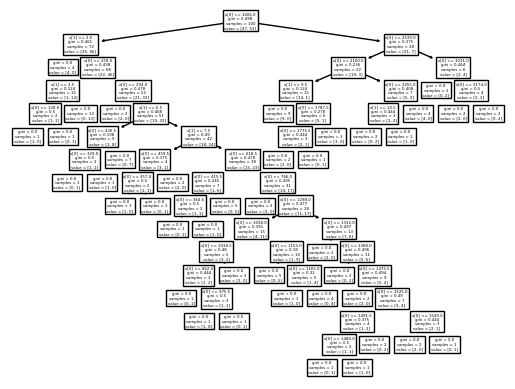

In [27]:
tree.plot_tree(clf)

Довольно большое деревце получилось)

In [36]:
recall_score(y_train[100:200], clf.predict(x_train[100:200])) 

0.6417910447761194

Много на свете метрик есть разных, вот они слева на право. Рекал скор - тп : (тп + фн), он прост и плечист, и за то ему БРАВО

In [35]:
f1_score(y_train[100:200], clf.predict(x_train[100:200])) 

0.6615384615384615

f1 надоел, и не мил ему счёт, его заботит лишь score

In [34]:
precision_score(y_train[100:200], clf.predict(x_train[100:200])) 

0.6825396825396826

и рядом precision "ыыыыыы-сокоро-работа?", подвывает ему в унисон

In [39]:
confusion_matrix(y_train[100:200], clf.predict(x_train[100:200]))

array([[13, 20],
       [24, 43]], dtype=int64)

confusion-matrix не особо умён, но рукаст и служил в исчислении

In [42]:
accuracy_score(y_train[100:200], clf.predict(x_train[100:200]))

0.56

accuracy - в компартии функциионер, построил себе многометровый классификат

а все они вместе доносят пример, как важен пролитариат

In [90]:
clf2 = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=2)
clf2 = clf2.fit(x_train[:100], y_train[:100])

добавляю мксимальную глубину ветви и минимальное значение для разделения узла

In [91]:
recall_score(y_train[100:200], clf2.predict(x_train[100:200])) 

0.6119402985074627

[Text(0.4646017699115044, 0.9545454545454546, 'x[0] <= 1606.0\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(0.1415929203539823, 0.8636363636363636, 'x[1] <= 2.5\ngini = 0.461\nsamples = 72\nvalue = [26, 46]'),
 Text(0.10619469026548672, 0.7727272727272727, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.17699115044247787, 0.7727272727272727, 'x[0] <= 259.0\ngini = 0.438\nsamples = 68\nvalue = [22, 46]'),
 Text(0.10619469026548672, 0.6818181818181818, 'x[1] <= 3.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.07079646017699115, 0.5909090909090909, 'x[0] <= 128.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.035398230088495575, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10619469026548672, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1415929203539823, 0.5909090909090909, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.24778761061946902, 0.6818181818181818, 'x[0] <= 294.0\ngini = 0.478\nsamples = 53\nvalue = [21, 32]'),
 Text(0.

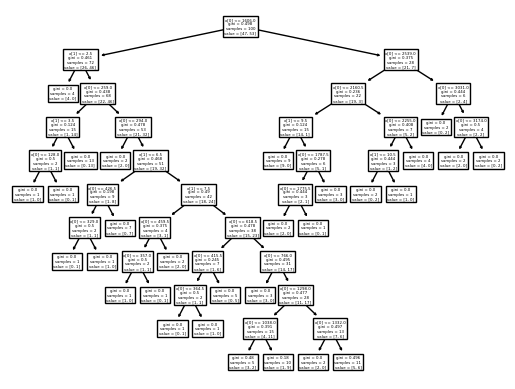

In [92]:
tree.plot_tree(clf2)

вот я понизил точность метрики и узлов у дерева стало меньше, наилучшая точность получилась у автоматически, проблема в том, что выборку беру небольшую, что бы обрабатывалось быстрее, и результат в обоих случая чуть лучше, чем на угад тыкать